In [298]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
import random

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [299]:
train = pd.read_csv('D:\\relaytrain_2_2_2_2_2_2_2_2_2_2_2_2.csv')
test = pd.read_csv('D:\\relaytest_2_2_2_2_2_2_2_2_2_2_2_2.csv')

In [300]:
print(train)

       custid  retained     created  firstorder  lastorder  esent   eopenrate  \
0      6H6T6N         0   9/28/2012   8/11/2013  8/11/2013     29  100.000000   
1      APCENR         1  12/19/2010    4/1/2011  1/19/2014     95   92.631579   
2      7UP6MS         0   10/3/2010   12/1/2010   7/6/2011      0    0.000000   
3      7ZEW8G         0  10/22/2010   3/28/2011  3/28/2011      0    0.000000   
4      8V726M         1  11/27/2010  11/29/2010  1/28/2013     30   90.000000   
...       ...       ...         ...         ...        ...    ...         ...   
24574  5WNJVM         1   1/16/2014   1/16/2014  1/16/2014      5   40.000000   
24575  ZTW78B         1   1/16/2014   1/16/2014  1/16/2014      6   66.666667   
24576  L2QV7D         1   1/18/2014   1/18/2014  1/18/2014      7   71.428571   
24577  GNKZUX         1   1/17/2014   1/18/2014  1/18/2014      6   83.333333   
24578  9WPFLJ         1   1/19/2014   1/20/2014  1/20/2014      5  100.000000   

       eclickrate  avgorder

### Null Evaluation

In [301]:
with pd.option_context('display.max_rows', 150):
     print(train.isnull().sum().sort_values(ascending = False))

with pd.option_context('display.max_rows', 150):
     print(test.isnull().sum().sort_values(ascending = False))

lastorder     17
firstorder    17
created       17
custid        17
city           0
favday         0
train          0
doorstep       0
refill         0
paperless      0
ordfreq        0
avgorder       0
eclickrate     0
eopenrate      0
esent          0
retained       0
dtype: int64
lastorder     3
firstorder    3
created       3
custid        3
city          0
favday        0
train         0
doorstep      0
refill        0
paperless     0
ordfreq       0
avgorder      0
eclickrate    0
eopenrate     0
esent         0
retained      0
dtype: int64


### Drop Lines With Nulls

In [302]:
#train = train.dropna()
#test = test.dropna()

### Separate the Labels

In [303]:
labeltrain = train.loc[:,'retained']
labeltest = test.loc[:,'retained']

train = train.drop(columns = 'retained')
test = test.drop(columns = 'retained')

### Creation of Dummy Variable 'weekend' (for question 4)

In [304]:
weekendtrain = []
for each in train.loc[:,'favday']:
    if each in ['Friday','Saturday','Sunday']:
        weekendtrain.append(1)
    else:
        weekendtrain.append(0)

train = pd.concat([train, pd.DataFrame(weekendtrain, columns = ['weekend'], index = train.index)], axis = 1)


weekendtest = []
for each in test.loc[:,'favday']:
    if each in ['Friday','Saturday','Sunday']:
        weekendtest.append(1)
    else:
        weekendtest.append(0)
        
test = pd.concat([test, pd.DataFrame(weekendtest, columns = ['weekend'],index = test.index)], axis = 1)

### Discretize ESent to Binary (no emails vs some emails)

In [305]:
'''

esenttrain = []
for each in train.loc[:,'esent']:
    if each > 0:
        esenttrain.append(1)
    else:
        esenttrain.append(0)
train = train.drop(columns = ['esent'])   
train = pd.concat([train, pd.DataFrame(esenttrain, columns = ['esent'], index = train.index)], axis = 1)


esenttest = []
for each in test.loc[:,'esent']:
    if each > 0:
        esenttest.append(1)
    else:
        esenttest.append(0)
test = test.drop(columns = ['esent'])        
test = pd.concat([test, pd.DataFrame(esenttest, columns = ['esent'],index = test.index)], axis = 1)
'''

"\n\nesenttrain = []\nfor each in train.loc[:,'esent']:\n    if each > 0:\n        esenttrain.append(1)\n    else:\n        esenttrain.append(0)\ntrain = train.drop(columns = ['esent'])   \ntrain = pd.concat([train, pd.DataFrame(esenttrain, columns = ['esent'], index = train.index)], axis = 1)\n\n\nesenttest = []\nfor each in test.loc[:,'esent']:\n    if each > 0:\n        esenttest.append(1)\n    else:\n        esenttest.append(0)\ntest = test.drop(columns = ['esent'])        \ntest = pd.concat([test, pd.DataFrame(esenttest, columns = ['esent'],index = test.index)], axis = 1)\n"

### Print Number of Each Class in Both Test and Train Datasets

In [306]:
trainlabel0 = 0
trainlabel1 = 0
for each in labeltrain:
    if each == 0:
        trainlabel0 += 1
    elif each == 1:
        trainlabel1 += 1

print('Train 0:', trainlabel0, 'Train 1:', trainlabel1)
        
testlabel0 = 0
testlabel1 = 0
for each in labeltest:
    if each == 0:
        testlabel0 += 1
    elif each == 1:
        testlabel1 += 1

print('Test 0:', testlabel0, 'Test 1:', testlabel1)

Train 0: 5042 Train 1: 19537
Test 0: 1287 Test 1: 4935


### Artificially Balance Both Datasets (optional, downsampling is randomized)

In [307]:
'''
labels = np.array(labeltrain)

defaultindex = []
for ind,each in enumerate(labels):
    if each == 0:
        defaultindex.append(ind)

selectionpool = defaultindex + list(random.sample(list(set(range(0,len(labels))) - set(defaultindex)), len(defaultindex)))

labeltrain = labels[selectionpool]
train = train.iloc[selectionpool,:]

'''

'''

labels = np.array(labeltest)

defaultindex = []
for ind,each in enumerate(labels):
    if each == 0:
        defaultindex.append(ind)

selectionpool = defaultindex + list(random.sample(list(set(range(0,len(labels))) - set(defaultindex)), len(defaultindex)))

labeltest = labels[selectionpool]
test = test.iloc[selectionpool,:]
'''

'\n\nlabels = np.array(labeltest)\n\ndefaultindex = []\nfor ind,each in enumerate(labels):\n    if each == 0:\n        defaultindex.append(ind)\n\nselectionpool = defaultindex + list(random.sample(list(set(range(0,len(labels))) - set(defaultindex)), len(defaultindex)))\n\nlabeltest = labels[selectionpool]\ntest = test.iloc[selectionpool,:]\n'

### Normalize Features (optional)

In [308]:

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(train.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']])  # .append(test.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']], ignore_index = True)
tr = scaler.transform(train.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']])
ts = scaler.transform(test.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']])

train = pd.DataFrame(tr, columns = train.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']].columns)
test = pd.DataFrame(ts, columns = test.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']].columns)


In [309]:
train

,esent,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,weekend
0,0.103943,0.034483,0.005584,0.000000,0.0,0.0,0.0,0.0
1,0.340502,0.105263,0.032187,0.055889,1.0,1.0,1.0,1.0
2,0.000000,0.000000,0.012915,0.018433,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.021137,0.000000,0.0,0.0,0.0,0.0
4,0.107527,0.133333,0.043040,0.002723,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24574,0.017921,0.200000,0.015384,0.000000,1.0,1.0,0.0,1.0
24575,0.021505,0.333333,0.015391,0.000000,1.0,0.0,0.0,1.0
24576,0.025090,0.142857,0.015391,0.000000,1.0,1.0,0.0,0.0
24577,0.021505,0.333333,0.033548,0.000000,1.0,0.0,0.0,0.0


### Question 1

Test Accuracy #1: 0.9429443908711025
Coefficients #1: {'esent': 39.6406611841169, 'eclickrate': 1.3528407682581083, 'avgorder': -2.218762424768821, 'ordfreq': -0.8276125781215109, 'paperless': 0.6429416445828873, 'refill': 0.720948969336671, 'doorstep': 0.7752913716124222}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

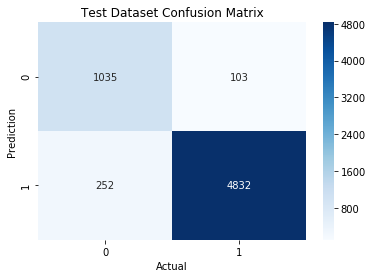

In [310]:
selection1 = ['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill', 'doorstep']
LRmodel1 = LogisticRegression()
LRmodel1.fit(train.loc[:,selection1],labeltrain)
print('Test Accuracy #1: ' + str(LRmodel1.score(test.loc[:,selection1],labeltest)))

coef1 = {}
for ind,each in enumerate(selection1):
    coef1[each] = LRmodel1.coef_[0][ind]
print('Coefficients #1: ' + str(coef1))

preds = LRmodel1.predict(test.loc[:,selection1])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Question 2

Test Accuracy #2: 0.7931533269045323
Coefficients #2: {'avgorder': 2.3068773323253975, 'ordfreq': 0.24723389043285512, 'paperless': 0.7953526493009817, 'refill': 0.8565071278343788, 'doorstep': 0.8555995775537006}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

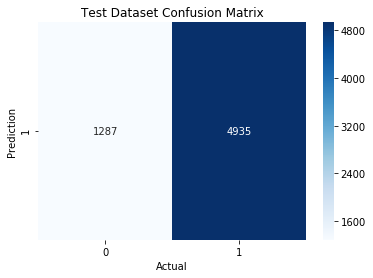

In [311]:
selection2 = ['avgorder', 'ordfreq', 'paperless', 'refill', 'doorstep']

LRmodel2 = LogisticRegression()
LRmodel2.fit(train.loc[:,selection2],labeltrain)
print('Test Accuracy #2: ' + str(LRmodel2.score(test.loc[:,selection2],labeltest)))

coef2 = {}
for ind,each in enumerate(selection2):
    coef2[each] = LRmodel2.coef_[0][ind]
print('Coefficients #2: ' + str(coef2))

preds = LRmodel2.predict(test.loc[:,selection2])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Question 3

Test Accuracy #3: 0.9281581485053038
Coefficients #3: {'esent': 40.39748279159004}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

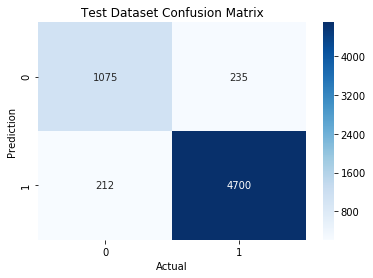

In [312]:
selection3 = ['esent']

LRmodel3 = LogisticRegression()
LRmodel3.fit(train.loc[:,selection3],labeltrain)
print('Test Accuracy #3: ' + str(LRmodel3.score(test.loc[:,selection3],labeltest)))

coef3 = {}
for ind,each in enumerate(selection3):
    coef3[each] = LRmodel3.coef_[0][ind]
print('Coefficients #3: ' + str(coef3))

preds = LRmodel3.predict(test.loc[:,selection3])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Question 4

Test Accuracy #4: 0.9416586306653809
Coefficients #4: {'esent': 39.670104837473545, 'eclickrate': 1.3543124632543582, 'avgorder': -2.2141639425106696, 'ordfreq': -0.8069665010160773, 'paperless': 0.6412993969624292, 'refill': 0.716158401383664, 'doorstep': 0.7642650307784828, 'weekend': 0.17820472917807972}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

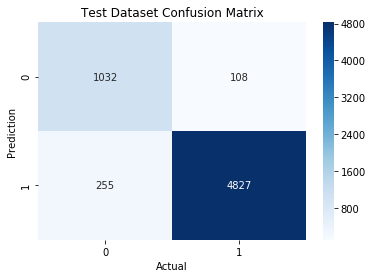

In [313]:
selection4 = ['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']

LRmodel4 = LogisticRegression() # , ‘lbfgs’, ‘sag’ and ‘saga’
LRmodel4.fit(train.loc[:,selection4],labeltrain)
print('Test Accuracy #4: ' + str(LRmodel4.score(test.loc[:,selection4],labeltest)))

coef4 = {}
for ind,each in enumerate(selection4):
    coef4[each] = LRmodel4.coef_[0][ind]
print('Coefficients #4: ' + str(coef4))

preds = LRmodel4.predict(test.loc[:,selection4])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Begin RandomForest Model

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
selection5 = ['esent', 'eclickrate', 'ordfreq', 'paperless', 'refill']

0.9525875924140148


Text(33.0, 0.5, 'Prediction')

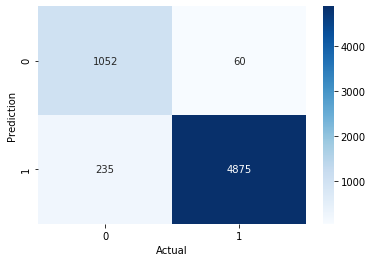

In [316]:
RFmodel = RandomForestClassifier(n_estimators = 100)
RFmodel.fit(train.loc[:,selection5], labeltrain)
preds = RFmodel.predict(test.loc[:,selection5])

cf = pd.crosstab(preds, labeltest)

print(RFmodel.score(test.loc[:,selection5],labeltest))

sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')

### Begin XGBoost Model

In [317]:
from xgboost import XGBClassifier
import xgboost as xgb

0.9553198328511733


Text(33.0, 0.5, 'Prediction')

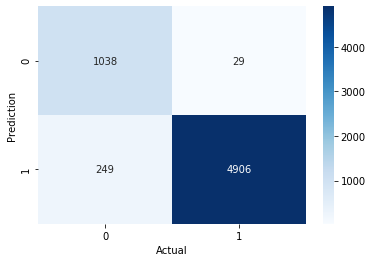

In [318]:
XGBmodel = XGBClassifier() 
XGBmodel.fit(train.loc[:,selection5], labeltrain)
preds = XGBmodel.predict(test.loc[:,selection5])

print(XGBmodel.score(test.loc[:,selection5],labeltest))

cf = pd.crosstab(preds, labeltest)

sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')

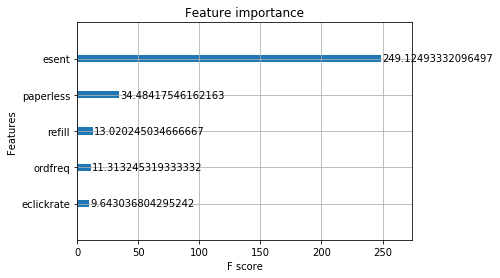

In [319]:
xgb.plot_importance(XGBmodel, importance_type = 'gain')

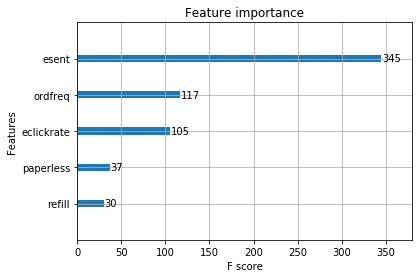

In [320]:
xgb.plot_importance(XGBmodel, importance_type = 'weight')

In [321]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

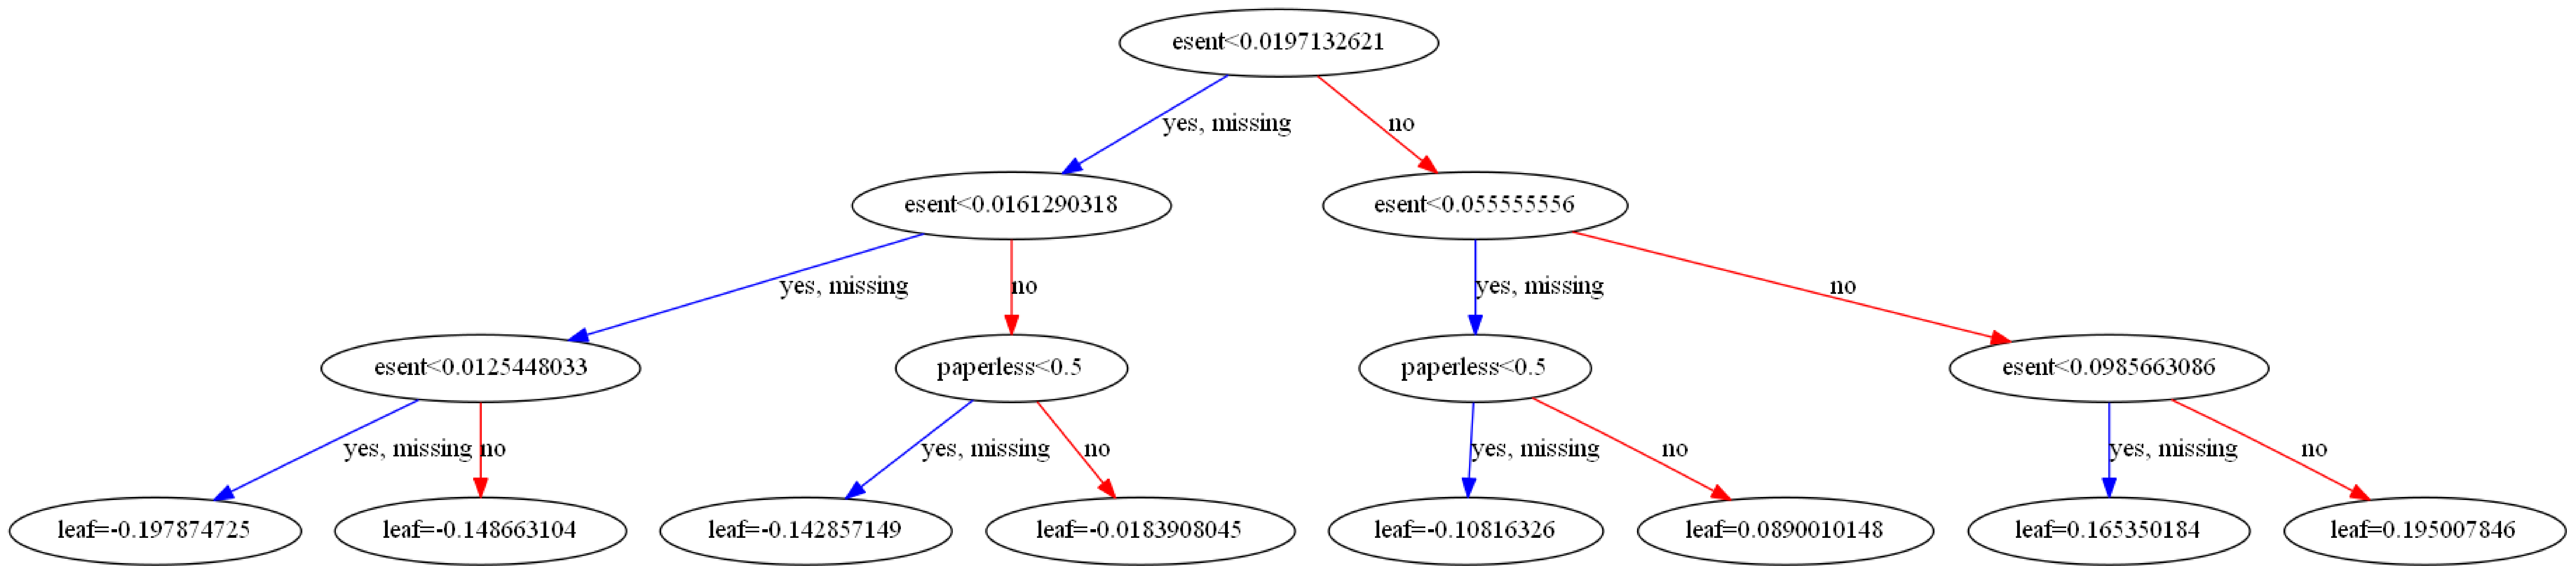

In [322]:
plot_tree(XGBmodel)

fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')